<a href="https://colab.research.google.com/github/Anshuman22coder/ML-projects/blob/main/LSTM_ACTUATOR_PROJECT_SGD_AFTER_ADAM_3.28_RMSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

data=pd.read_csv("/content/3p5_1.csv",index_col="0")
data1=pd.read_csv("/content/4p0_1.csv",index_col="0")
data2=pd.read_csv("/content/4p5_1.csv",index_col="0")
data3=pd.read_csv("/content/5p0_1.csv",index_col="0")
data4=pd.read_csv("/content/5p5_1.csv",index_col="0")



In [ ]:
#removing all zero-ed rows ..

zero_sum_rows=data[data.apply(lambda row:row.sum()==0,axis=1)].index  # the axis=1 is across columns.. or each row will be accessed one by one,,
data=data.drop(zero_sum_rows)
data.head()
data.shape  #(60643, 11)



(60643, 11)

In [ ]:

zero_sum_rows=data1[data1.apply(lambda row:row.sum()==0,axis=1)].index   # the axis=1 is across columns.. or each row will be accessed one by one,,
data1=data1.drop(zero_sum_rows)
data1.shape

zero_sum_rows=data2[data2.apply(lambda row:row.sum()==0,axis=1)].index
data2=data2.drop(zero_sum_rows)


zero_sum_rows=data3[data3.apply(lambda row:row.sum()==0,axis=1)].index
data3=data3.drop(zero_sum_rows)


zero_sum_rows=data4[data4.apply(lambda row:row.sum()==0,axis=1)].index
data4=data4.drop(zero_sum_rows)
data4.shape  #(23026, 11)





(23026, 11)

In [ ]:
# merging of data frames;;
listOfframes=[data,data1,data2,data3,data4]
data=pd.concat(listOfframes)
data.head()
data.shape  #(217329, 11)



(217329, 11)

In [ ]:
data.head()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11
0,,,,,,,,,,,
2251.06,-0.006,1.007,0,-0.058,0.2,0.00,0.204,3.059,0.036,0.00,0.00
2251.07,-0.010,0.699,0,-0.058,0.2,-1.32,0.204,3.055,0.241,0.01,0.01
2251.08,-0.004,0.858,0,-0.736,0.2,-2.28,0.204,3.065,0.033,0.02,0.02
2251.09,-0.007,0.908,0,-2.164,0.2,-2.66,0.204,3.054,0.242,0.03,0.03
2251.10,-0.012,0.838,0,-2.849,0.2,-2.53,0.204,3.052,0.036,0.04,0.04


In [ ]:
# sorting the data on  the  basis of time ..
data=data.sort_values(by="0")
data.head()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11
0,,,,,,,,,,,
2251.06,-0.006,1.007,0,-0.058,0.2,0.00,0.204,3.059,0.036,0.00,0.00
2251.07,-0.010,0.699,0,-0.058,0.2,-1.32,0.204,3.055,0.241,0.01,0.01
2251.08,-0.004,0.858,0,-0.736,0.2,-2.28,0.204,3.065,0.033,0.02,0.02
2251.09,-0.007,0.908,0,-2.164,0.2,-2.66,0.204,3.054,0.242,0.03,0.03
2251.10,-0.012,0.838,0,-2.849,0.2,-2.53,0.204,3.052,0.036,0.04,0.04


In [ ]:
# requiring only column 1, 8 as predictors and 2nd as prediction ..
data.head()
data_=data.iloc[:,[0,7,1]]
type(data_)  # dataframes,,
print(data_.head(200))
data_.shape

           0.1    0.8    0.2
0                           
2251.06 -0.006  3.059  1.007
2251.07 -0.010  3.055  0.699
2251.08 -0.004  3.065  0.858
2251.09 -0.007  3.054  0.908
2251.10 -0.012  3.052  0.838
...        ...    ...    ...
2253.01  0.479  1.745  0.878
2253.02  0.469  1.759  0.451
2253.03  0.447  1.768  0.739
2253.04  0.443  1.753  0.480
2253.05  0.434  1.756  0.798

[200 rows x 3 columns]


(217329, 3)

In [ ]:
# changing column names..

current_col_names=list(data_.columns)
print(current_col_names)
current_col_names[0]="pressure_predictor1"
current_col_names[1]="strain_predictor2"
current_col_names[2]="force_prediction"
data_.columns=current_col_names
print(data_.head())
data_.shape




['0.1', '0.8', '0.2']
         pressure_predictor1  strain_predictor2  force_prediction
0                                                                
2251.06               -0.006              3.059             1.007
2251.07               -0.010              3.055             0.699
2251.08               -0.004              3.065             0.858
2251.09               -0.007              3.054             0.908
2251.10               -0.012              3.052             0.838


(217329, 3)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
predictors=data_[["pressure_predictor1","strain_predictor2"]]  # predictors
prediction=data_[["force_prediction"]]  #target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = pd.DataFrame(scaler_X.fit_transform(predictors), columns=predictors.columns)
y_scaled=pd.DataFrame(scaler_y.fit_transform(prediction),columns=prediction.columns)
data_scaled=pd.concat([X_scaled,y_scaled],axis=1)

In [ ]:
df=data_scaled.copy()

df.head(15)

,pressure_predictor1,strain_predictor2,force_prediction
0,0.006512,0.981476,0.061139
1,0.004651,0.980198,0.050494
2,0.007442,0.983392,0.055989
3,0.006047,0.979879,0.057718
4,0.003721,0.979240,0.055298
5,0.001860,0.981476,0.052879
6,0.004186,0.989780,0.060448
7,0.004186,0.984989,0.053570
8,0.002326,0.976685,0.058720
9,0.003256,0.981476,0.047729


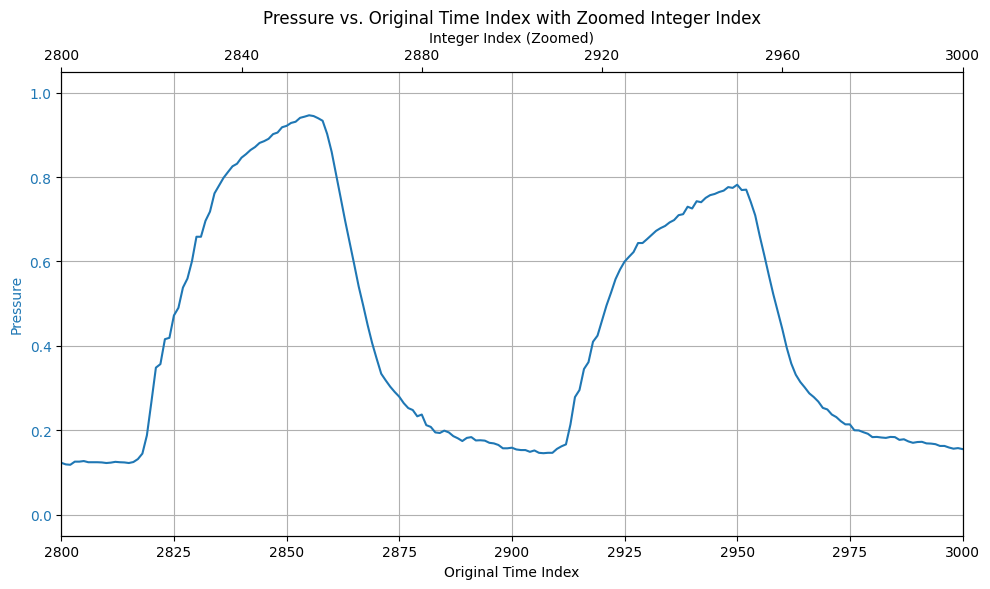

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is 'df' with a float index
# and a 'pressure_predictor1' column

fig, ax1 = plt.subplots(figsize=(10, 6))
start_time = 2800
end_time = 3000

color = 'tab:blue'
ax1.set_xlabel('Original Time Index')
ax1.set_ylabel('Pressure', color=color)
ax1.plot(df.index, df['pressure_predictor1'], color=color)
ax1.set_xlim(start_time, end_time)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Create a secondary x-axis
ax2 = ax1.twiny()

# Get the new integer index range corresponding to the zoomed time range
start_index = df.index[df.index >= start_time].min()
end_index = df.index[df.index <= end_time].max()

start_loc = df.index.get_loc(start_index)
end_loc = df.index.get_loc(end_index)

# Set the limits of the secondary x-axis to match the zoomed integer index range
ax2.set_xlim(start_loc, end_loc)
ax2.set_xlabel('Integer Index (Zoomed)')
ax2.tick_params(axis='x')

# Adjust the tick locations and labels for ax2 to be more meaningful
integer_ticks = range(start_loc, end_loc + 1, max(1, (end_loc - start_loc) // 5)) # Adjust step as needed
ax2.set_xticks(integer_ticks)

plt.title('Pressure vs. Original Time Index with Zoomed Integer Index')
plt.tight_layout()
plt.show()

In [ ]:
# converting dataframe to numpy array..for working on lstm,,

dn=data_scaled[["pressure_predictor1","strain_predictor2","force_prediction"]].values

"""dn1=dn[0:50,:]
dn2=dn[50:100,:]
print(dn2)"""

'dn1=dn[0:50,:]\ndn2=dn[50:100,:]\nprint(dn2)'

In [ ]:
# converting dataframe to numpy array..for working on lstm,,

dn=data_scaled[["pressure_predictor1","strain_predictor2","force_prediction"]].values

"""dn1=dn[0:50,:]
dn2=dn[50:100,:]
print(dn2)"""

'dn1=dn[0:50,:]\ndn2=dn[50:100,:]\nprint(dn2)'

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

def generate_enriched_features(data, window_size=10):
    """
    data: numpy array of shape (N, 3) — pressure, strain, force
    returns: enriched_data of shape (N - window_size, 16)
    """
    enriched_rows = []

    for i in range(window_size, len(data)):
        window = data[i - window_size:i]  # shape (10, 3)

        pressure = window[:, 0]
        strain = window[:, 1]
        force_window = window[:, 2]

        # Extract 6 features each for pressure and strain
        p_feats = [np.mean(pressure), np.std(pressure),
                   np.min(pressure), np.max(pressure),
                   skew(pressure), kurtosis(pressure)]

        s_feats = [np.mean(strain), np.std(strain),
                   np.min(strain), np.max(strain),
                   skew(strain), kurtosis(strain)]

        # Extract 1 feature from force
        f_mean_window = np.mean(force_window)

        # Add current raw values at index i
        current_pressure = data[i, 0]
        current_strain = data[i, 1]
        current_force = data[i, 2]

        row = p_feats + s_feats + [current_pressure, current_strain, current_force, f_mean_window]
        enriched_rows.append(row)

    return np.array(enriched_rows)


def create_lstm_sequences(enriched_data, window_size=10, step_size=5):
    """
    enriched_data: shape (N, 16)
    returns:
      - X: shape (samples, 10, 12) → only 12 selected columns for LSTM
      - y: shape (samples,) → force at t + window_size
    """
    X = []
    y = []

    # Only select first 12 columns for LSTM input
    features_only = enriched_data[:, :12]
    force_column = enriched_data[:, 15]  # f_mean force at time t (for label)

    for i in range(0, len(features_only) - window_size, step_size):
        x_seq = features_only[i:i+window_size]
        label = force_column[i + window_size-1]  # force at t+10
        X.append(x_seq)
        y.append(label)

    return np.array(X), np.array(y)


In [ ]:

from sklearn.preprocessing import MinMaxScaler
# Assuming dn.shape = (5444456, 3) — [pressure, strain, force]
enriched = generate_enriched_features(dn, window_size=10)
enriched_data=enriched.copy()
print("Enriched data shape:", enriched.shape)  # (N, 16)

# Scale first 12 columns (features)
enriched_data[:, :12] = scaler_X.fit_transform(enriched[:, :12])

# Scale column 15 (force mean from previous window) separately
enriched_data[:, 15] = scaler_y.fit_transform(enriched[:, 15].reshape(-1,1)).flatten()  #reshaping 1d column to 2d array with one column, the -1 is nothing but automatically shapes the array, and then again flatten is done to convert back to 1d..as required for the enriched[:15]


all_X, all_y = create_lstm_sequences(enriched_data, window_size=10, step_size=5)
print("LSTM input shape:", all_X.shape)  # (samples, 10, 12)
print("Labels shape:", all_y.shape)      # (samples,)



Enriched data shape: (217319, 16)
LSTM input shape: (43462, 10, 12)
Labels shape: (43462,)


In [ ]:

X=all_X
Y=all_y
#shuffling as a whole..
indices=np.random.permutation(len(X))       # indices=array([4052, 109, 7011, 3230, 582,.,0,..,1,.., 693])
X=X[indices]
Y=Y[indices]
"""
X=all_X;
Y=all_y;
indices=np.random.permutation(len(X))
X=X[indices]
"""

'\nX=all_X;\nY=all_y;\nindices=np.random.permutation(len(X))\nX=X[indices]\n'

In [ ]:
#train-test and unseen data  split..
from sklearn.model_selection import train_test_split
X_temp,X_unseen,y_temp,y_unseen=train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=False) # here shuffle is false must be false because, lstm is time-series analysis and order of the dataset is very important...

In [ ]:
#train-test split..
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_temp,y_temp,test_size=0.2,random_state=42,shuffle=False) # here shuffle is false must be false because, lstm is time-series analysis and order of the dataset is very important...

In [ ]:
"""from tensorflow.keras.models import load_model
model = load_model("/content/final_model_time_step_10_overlap_5_batch_size_32_rmse_3.28_attention_layer_adam.h5", compile=False)
"""

NotImplementedError: Exception encountered when calling Lambda.call().

[1mWe could not automatically infer the shape of the Lambda's output. Please specify the `output_shape` argument for this Lambda layer.[0m

Arguments received by Lambda.call():
  • args=('<KerasTensor shape=(None, 10, 64), dtype=float32, sparse=False, name=keras_tensor_82>',)
  • kwargs={'mask': 'None'}

In [ ]:
from tensorflow.keras import backend as K

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization, Bidirectional, Attention
import tensorflow as tf
from tensorflow.keras.layers import Lambda

input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

# First LSTM layer (return sequences=True for attention)
x = LSTM(128, recurrent_dropout=0.2, return_sequences=True)(input_layer)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)

x = LSTM(64, recurrent_dropout=0.2, return_sequences=True)(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)

# Bidirectional LSTM layer (return sequences=True for attention to work)
x = Bidirectional(LSTM(32, return_sequences=True))(x)
x = Dropout(0.1)(x)
x = BatchNormalization()(x)

# Attention layer: self-attention on LSTM outputs
attention_out = Attention()([x, x])  # query and value are both LSTM outputs
context_vector = Lambda(lambda x: tf.reduce_sum(x, axis=1))(attention_out)  # Sum over time steps to get context vector

# Final Dense output layer for regression
output = Dense(1, activation='linear')(context_vector)

# Build and compile model
model = Model(inputs=input_layer, outputs=output)

# Choose optimizer - SGD or Adam (example SGD here)
#optimizer = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
optimizer = Adam(learning_rate=0.001, clipnorm=1.0)  # alternatively

model.compile(optimizer=optimizer, loss=root_mean_squared_error)

model.summary()


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 10, 12)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 10, 128)   │     72,192 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 10, 128)   │          0 │ lstm_3[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 10, 128)   │        512 │ dropout_3[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ (None, 10, 64)    │     49,408 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 10, 64)    │          0 │ lstm_4[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 10, 64)    │        256 │ dropout_4[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 10, 64)    │     24,832 │ batch_normalizat… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 10, 64)    │          0 │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 10, 64)    │        256 │ dropout_5[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_1         │ (None, 10, 64)    │          0 │ batch_normalizat… │
│ (Attention)         │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 64)        │          0 │ attention_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1)         │         65 │ lambda[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 147,521 (576.25 KB)

 Trainable params: 147,009 (574.25 KB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
from tensorflow.keras.optimizers import SGD

optimizer = SGD(
    learning_rate=0.001,   # Controls how fast the model learns
    momentum=0.8,          # Adds momentum to smooth out updates
    nesterov=True,         # Uses Nesterov Accelerated Gradient
    weight_decay=1e-3,      # (TF 2.13+) L2 weight decay to prevent overfitting, similar to l1 , decreases the weight to 0 for overfitting,,
    clipnorm=0.5,         # Gradient clipping by norm
    clipvalue=None,        # Gradient clipping by value

)
model.compile(optimizer=optimizer, loss=root_mean_squared_error)


In [ ]:
##early stoppings..###

import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,  ##difference between 2 val_loss ,, if the differnce comming to be <0.0001 then stop.
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',    # Monitor validation loss
    factor=0.5,            # Reduce LR by this factor (e.g., 0.001 → 0.0005)
    patience=3,            # Wait 3 epochs before reducing LR
    verbose=1,             # Print updates
    min_lr=1e-6            # Never go below this LR
)

In [ ]:
history=model.fit(    X_train, y_train,validation_data=(X_test,y_test),
     initial_epoch=136,
    epochs=200,
    batch_size=16,
    callbacks=[early_stopping,reduce_lr]
)

Epoch 137/200
1739/1739 ━━━━━━━━━━━━━━━━━━━━ 92s 53ms/step - loss: 0.1388 - val_loss: 0.1368 - learning_rate: 0.0010
Epoch 138/200
1739/1739 ━━━━━━━━━━━━━━━━━━━━ 138s 51ms/step - loss: 0.1402 - val_loss: 0.1331 - learning_rate: 0.0010
Epoch 139/200
1739/1739 ━━━━━━━━━━━━━━━━━━━━ 141s 50ms/step - loss: 0.1384 - val_loss: 0.1347 - learning_rate: 0.0010
Epoch 140/200
1739/1739 ━━━━━━━━━━━━━━━━━━━━ 90s 52ms/step - loss: 0.1394 - val_loss: 0.1312 - learning_rate: 0.0010
Epoch 141/200
1739/1739 ━━━━━━━━━━━━━━━━━━━━ 89s 51ms/step - loss: 0.1403 - val_loss: 0.1310 - learning_rate: 0.0010
Epoch 142/200
1739/1739 ━━━━━━━━━━━━━━━━━━━━ 142s 52ms/step - loss: 0.1377 - val_loss: 0.1311 - learning_rate: 0.0010
Epoch 143/200
1739/1739 ━━━━━━━━━━━━━━━━━━━━ 141s 51ms/step - loss: 0.1384 - val_loss: 0.1458 - learning_rate: 0.0010
Epoch 144/200
1738/1739 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1378
Epoch 144: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1739/1739 ━━━━━━━━━━━━━━━━

In [ ]:
model.save("final_model_time_step_10_overlap_5_batch_size_32_rmse_3.28_attention_layer_adam.h5")

In [ ]:
from google.colab import files
files.download("final_model_time_step_10_overlap_5_batch_size_32_rmse_3.28_attention_layer_adam.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
predictors=data_[["pressure_predictor1","strain_predictor2"]]  # predictors
prediction=data_[["force_prediction"]]  #target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = pd.DataFrame(scaler_X.fit_transform(predictors), columns=predictors.columns)
y_scaled=pd.DataFrame(scaler_y.fit_transform(prediction),columns=prediction.columns)
data_scaled=pd.concat([X_scaled,y_scaled],axis=1)

In [ ]:
#unscalling of the rmse..

loss=model.evaluate(X_unseen,y_unseen,batch_size=4)     # loss on unseen data .....  # by default the batch_size on unseen data is 32;

loss_unscaled=(loss )*(scaler_y.data_max_-scaler_y.data_min_)  # for descalling the rmse..


"""min_val=data["0.2"].min()
max_val=data["0.2"].max()

if(max_val-min_val==0):
  loss_unscaled=0.0;
else:

    loss_unscaled = ((loss) * (max_val - min_val))+min_val

print(min_val,max_val)"""


#3.28 units RMSE..


2174/2174 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.1147


'min_val=data["0.2"].min()\nmax_val=data["0.2"].max()\n\nif(max_val-min_val==0):\n  loss_unscaled=0.0;\nelse:\n\n    loss_unscaled = ((loss) * (max_val - min_val))+min_val\n\nprint(min_val,max_val)'

In [ ]:
print(loss_unscaled)
print(scaler_y.data_max_)
print(scaler_y.data_min_)

[3.28865418]
[28.172]
[-0.762]


In [ ]:
#relative rmse for finding whether the model is acceptable or not ..
relative_rmse=loss_unscaled[0]/(scaler_y.data_max_-scaler_y.data_min_)
print(relative_rmse[0])
print(round(relative_rmse[0]*100,2))

0.1136605441570282
11.37


In [ ]:
y_pred=model.predict(X_unseen,batch_size=5)
y_pred.shape

1739/1739 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step


(8693, 1)

In [ ]:
y_pred_descaled = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_true_descaled = scaler_y.inverse_transform(y_unseen.reshape(-1, 1)).flatten()

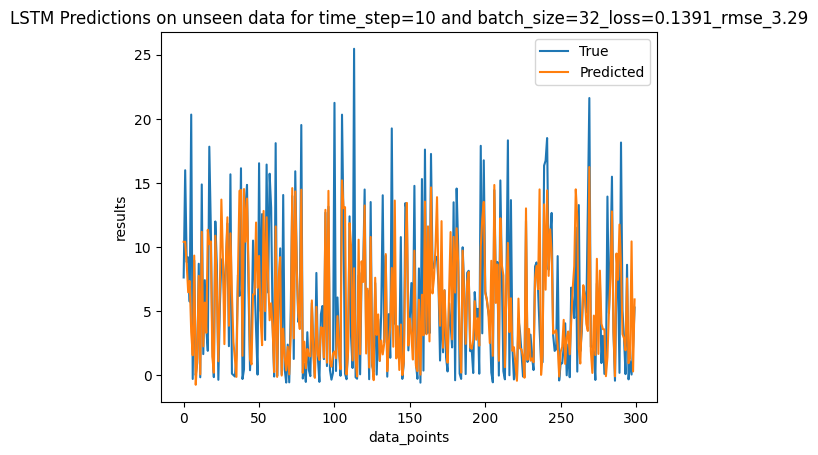

In [ ]:
     # unseen data losses calculation....changing the batch_size This only affects speed and memory usage, not the final output values.

# no accuarcy_score for regression



import matplotlib.pyplot as plt
plt.plot(y_true_descaled[0:300], label='True')
plt.plot(y_pred_descaled[0:300],label="Predicted")
plt.xlabel("data_points")
plt.ylabel("results")
plt.legend()  # will show the label's defined for each
plt.title("LSTM Predictions on unseen data for time_step=10 and batch_size=32_loss=0.1391_rmse_3.28")
plt.show()



In [ ]:
model.save("final_model_time_step_10_overlap_5_batch_size_32_rmse_3.29_sgd_after_adam_attention.h5")

In [ ]:
from google.colab import files
files.download("final_model_time_step_10_overlap_5_batch_size_32_rmse_3.28_sgd_after_adam_attention.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(y_unseen[0])

0.28955919908212735


In [ ]:
X_seq=X_unseen[0].reshape(1,10,12)
y_new_pred=model.predict(X_seq,batch_size=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


In [ ]:
y_new_pred_unscaled=y_new_pred[0]*(scaler_y.data_max_-scaler_y.data_min_)
print(y_new_pred_unscaled)

[11.1571772]


In [ ]:
y_true_unscaled=y_unseen[0]*(scaler_y.data_max_-scaler_y.data_min_)
print( y_true_unscaled)

[8.37810587]


In [ ]:
print("difference between predicted and true is",(y_new_pred_unscaled-y_true_unscaled))

difference between predicted and true is [2.77907134]
